In [1]:
using Images

In [2]:
function juliaset{T<:Real}(c::Complex{T}; zmax::T=4.0, ulim::Tuple{T, T}=(-2.0, 2.0), vlim::Tuple{T, T}=(-2.0, 2.0), width::Int=200, height::Int=200, max_iteration::Int=1000)
    buf = Array{Float64}(width, height)

    us = linspace(ulim[1], ulim[2], width)
    vs = linspace(vlim[1], vlim[2], height)

    for x in 1:width, y in 1:height
        z = us[x] + vs[y]*im
        n = 0
        while abs(z) <= zmax && n < max_iteration
            z = z*z + c
            n += 1
        end
        buf[y, x] = (max_iteration - n)/max_iteration
    end
    return buf
end

juliaset (generic function with 1 method)

  2.612803 seconds (1.01 M allocations: 59.239 MiB, 0.96% gc time)


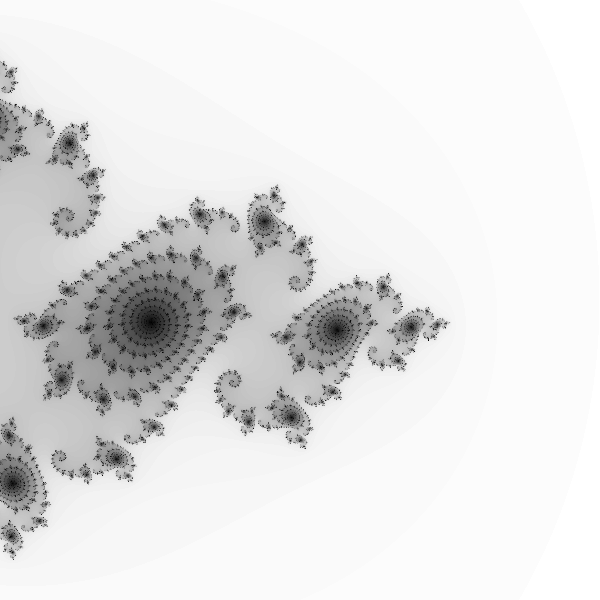

In [3]:
@time Gray.(juliaset(-0.75-0.15im; zmax=2.0, ulim=(0.0, 2.0), vlim=(-1.0, 1.0), width=600, height=600) .^ 10)

  0.116395 seconds (6.11 k allocations: 5.794 MiB, 6.14% gc time)


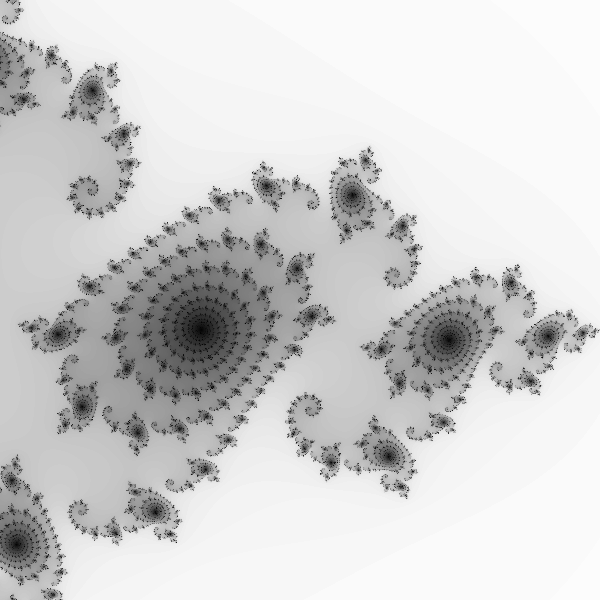

In [5]:
@time Gray.(juliaset(-0.75-0.15im; zmax=2.0, ulim=(0.0, 1.5), vlim=(-.75, 0.75), width=600, height=600) .^ 10)